## GeohashPandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://vgridpandas.gishub.vn/lab/index.html?path=notebooks/09_geohash.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/master)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD)

### Install vgridpandas

In [ ]:
# %pip install vgridpandas

### Latlong to Geohash

In [1]:
import pandas as pd
from vgridpandas import geohashpandas
df = pd.DataFrame({'lat': [10.775299665325505, 10.775299665325505], 'lon':[106.70647975040788,-171.58256682775985]})
resolution = 2
df = df.geohash.latlon2geohash(resolution)
df

,lat,lon
geohash_02,,
w3,10.7753,106.706480
81,10.7753,-171.582567


### Geohash to geo boundary

In [2]:
df = df.geohash.geohash2geo()
df

,lat,lon,geometry
geohash_02,,,
w3,10.7753,106.706480,"POLYGON ((101.25 5.625, 112.5 5.625, 112.5 11...."
81,10.7753,-171.582567,"POLYGON ((-180 5.625, -168.75 5.625, -168.75 1..."


### (Multi)Linestring/ (Multi)Polygon to Geohash

<Axes: >

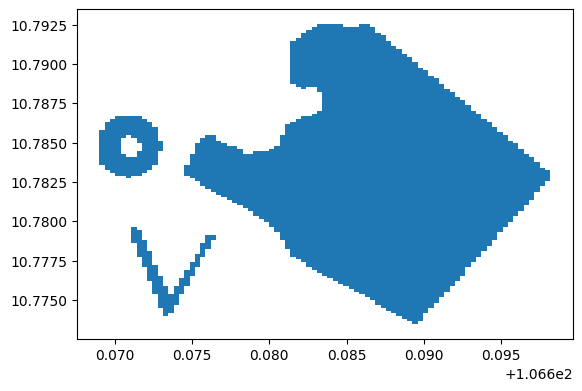

In [3]:
import geopandas as gpd
from vgridpandas import geohashpandas

gdf = gpd.read_file('https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/polygon.geojson')
resolution = 8
gdf_polyfill = gdf.geohash.polyfill(resolution, predicate = "intersects", compact = True)
gdf_polyfill = gdf_polyfill.geohash.geohash2geo(geohash_column = "geohash_polyfill")
gdf_polyfill.plot()

### Geohash point binning

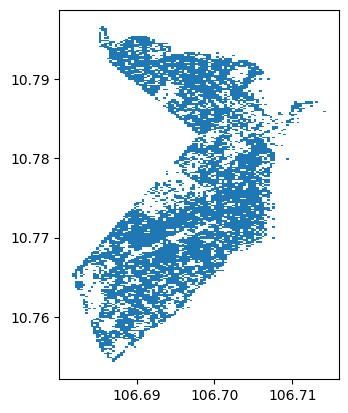

In [5]:
resolution = 8
# df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
df.head()
stats = "count"
df_bin = df.geohash.geohashbin(resolution=resolution, stats = stats, return_geometry=True)
df_bin.plot()
df_bin.to_file(f"dist1_pois_geohash_{resolution}.geojson", driver="GeoJSON")